In [1]:
# Dependencies and Setup
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib import dates as mpl_dates
from matplotlib.pyplot import figure
from scipy.stats import linregress
# File to Load (Remember to Change These)
file_to_load = "csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
file_to_load2 = "csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(file_to_load)
df_2 = pd.read_csv(file_to_load2)

# Which States Implentment Stay at Home Order Better? 

## California COVID-19 Infection Data 

In [2]:
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,133,133,133,135,135,136,136,136,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,13,13,13,14,14,14,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,897,903,923,974,1043,1068,1118,1213,1252,1298
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,51,51,51,51,51,51,53,53,53,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,84070008,US,USA,840,NaN,Marine Corps,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,253
3265,84070009,US,USA,840,NaN,Navy,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1631
3266,84070013,US,USA,840,NaN,Staff,Federal Bureau of Prisons,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,319
3267,84070010,US,USA,840,NaN,Unassigned,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1810


In [3]:
california_df = df.loc[df['Province_State'] == 'California']
california_df = california_df.drop(['Admin2','Province_State','Country_Region','UID','iso2','iso3','code3','FIPS','Lat','Long_','4/19/20','4/20/20','4/21/20'],axis = 1)
california_df = california_df.set_index('Combined_Key')
california_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Alameda, California, US",0,0,0,0,0,0,0,0,0,0,...,674,766,806,845,888,888,964,1007,1063,1114
"Alpine, California, US",0,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,2
"Amador, California, US",0,0,0,0,0,0,0,0,0,0,...,3,7,7,7,7,7,7,7,7,7
"Butte, California, US",0,0,0,0,0,0,0,0,0,0,...,13,13,14,14,14,15,16,16,16,16
"Calaveras, California, US",0,0,0,0,0,0,0,0,0,0,...,5,8,8,8,8,9,9,11,11,12
"Colusa, California, US",0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
"Contra Costa, California, US",0,0,0,0,0,0,0,0,0,0,...,484,511,530,539,552,552,615,631,648,685
"Del Norte, California, US",0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
"El Dorado, California, US",0,0,0,0,0,0,0,0,0,0,...,29,30,32,32,32,34,35,35,36,36


In [4]:
#Check for any null value in dataframe 
null_data = california_df[california_df.isnull().any(axis=1)]
null_data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,


In [5]:
#Find the first date of infection, which is when sum(infection number) > 0 
#1/26/20 is the first confirmed date in California 
california_df_sum= california_df.sum(axis = 0)
california_df_sum = california_df_sum.to_frame()
california_df_sum = california_df_sum.reset_index()
#california_df_sum = california_df_sum.(columns={'Index':'Date','':'Infection number'})
california_df_sum
#california_df_sum.plot(kind= "line", x='index')

,index,0
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,2
...,...,...
83,4/14/20,25356
84,4/15/20,26686
85,4/16/20,27677
86,4/17/20,29157


In [6]:
california_df_sum.columns = ['Date', 'Infection number']

In [7]:
california_df_sum

,Date,Infection number
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,2
...,...,...
83,4/14/20,25356
84,4/15/20,26686
85,4/16/20,27677
86,4/17/20,29157


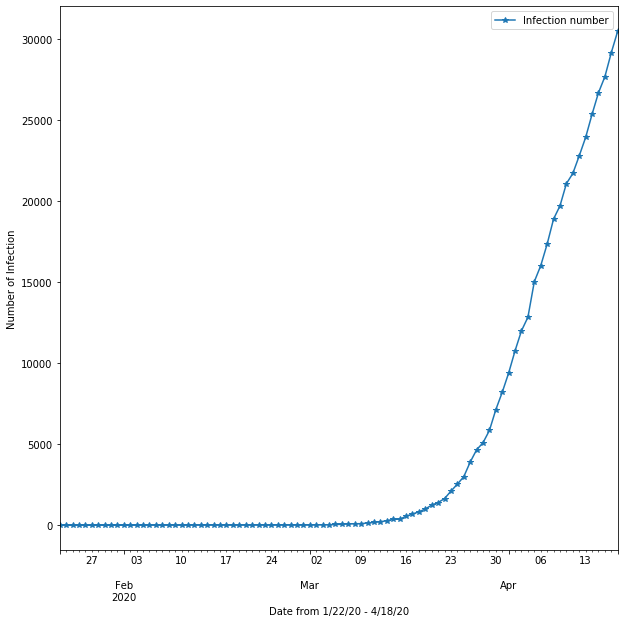

In [8]:
california_df_sum['Date'] = pd.to_datetime(california_df_sum['Date'])
california_df_sum.plot(kind= "line", x='Date',y='Infection number', marker = '*',figsize =(10,10))
plt.ylabel("Number of Infection")
plt.xlabel("Date from 1/22/20 - 4/18/20")
plt.savefig("0122_0402_Infection.png")


In [9]:
#Orginztion and pick out the important date 
ca_key_date_df= california_df[['1/25/20','1/26/20','3/18/20','3/19/20','3/20/20','4/2/20','4/18/20']]
ca_key_date_df

,1/25/20,1/26/20,3/18/20,3/19/20,3/20/20,4/2/20,4/18/20
Combined_Key,,,,,,,
"Alameda, California, US",0,0,30,38,48,359,1114
"Alpine, California, US",0,0,0,0,0,1,2
"Amador, California, US",0,0,0,0,0,3,7
"Butte, California, US",0,0,0,0,0,9,16
"Calaveras, California, US",0,0,2,2,2,3,12
"Colusa, California, US",0,0,0,0,0,1,3
"Contra Costa, California, US",0,0,39,41,46,250,685
"Del Norte, California, US",0,0,0,0,0,0,2
"El Dorado, California, US",0,0,0,0,0,18,36


In [10]:
infection_rate_shelter = ca_key_date_df['4/18/20'] - ca_key_date_df['3/19/20']
ca_key_date_df['Infection after shelter at home'] = infection_rate_shelter
ca_key_date_df = ca_key_date_df.sort_values(by = ['Infection after shelter at home'], ascending = False)
ca_key_date_df

C:\Users\ericw\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,1/25/20,1/26/20,3/18/20,3/19/20,3/20/20,4/2/20,4/18/20,Infection after shelter at home
Combined_Key,,,,,,,,
"Los Angeles, California, US",0,1,190,231,292,4045,12021,11790
"Riverside, California, US",0,0,16,22,28,493,2457,2435
"San Diego, California, US",0,0,60,80,127,849,2158,2078
"Santa Clara, California, US",0,0,175,189,196,1019,1870,1681
"Orange, California, US",0,1,29,53,65,656,1556,1503
"San Bernardino, California, US",0,0,3,5,9,254,1219,1214
"Alameda, California, US",0,0,30,38,48,359,1114,1076
"San Francisco, California, US",0,0,51,70,76,450,1137,1067
"Sacramento, California, US",0,0,40,45,53,314,914,869


In [11]:
#Calculating infection number after shelter at home 
infection_number_shelter = ca_key_date_df['Infection after shelter at home'].sum()
infection_shelter_start = ca_key_date_df['3/19/20'].sum()
infection_to_date = ca_key_date_df['4/18/20'].sum()
infection_14_day_period = ca_key_date_df['4/2/20'].sum() - ca_key_date_df['3/19/20'].sum()
infection_after_14_day = ca_key_date_df['4/18/20'].sum() - ca_key_date_df['4/2/20'].sum()

print(f"Total infection from 1/22/20 to 03/19/20: {infection_shelter_start} people")
print(f"Total infection to 1/22/20 to 04/18/20: {infection_to_date} people")
print(f"There are {infection_number_shelter} infection after shelter at home was ordered")
print(f"Infection between 03/19/20 to 04/02/20: {infection_14_day_period}")
print(f"Infection between 04/02/18 to 04/18/20: {infection_after_14_day}")



Total infection from 1/22/20 to 03/19/20: 1005 people
Total infection to 1/22/20 to 04/18/20: 30491 people
There are 29486 infection after shelter at home was ordered
Infection between 03/19/20 to 04/02/20: 9768
Infection between 04/02/18 to 04/18/20: 19718


In [12]:
ca_top20_infeciton_df = ca_key_date_df.head(20)
ca_top20_infeciton_df

,1/25/20,1/26/20,3/18/20,3/19/20,3/20/20,4/2/20,4/18/20,Infection after shelter at home
Combined_Key,,,,,,,,
"Los Angeles, California, US",0,1,190,231,292,4045,12021,11790
"Riverside, California, US",0,0,16,22,28,493,2457,2435
"San Diego, California, US",0,0,60,80,127,849,2158,2078
"Santa Clara, California, US",0,0,175,189,196,1019,1870,1681
"Orange, California, US",0,1,29,53,65,656,1556,1503
"San Bernardino, California, US",0,0,3,5,9,254,1219,1214
"Alameda, California, US",0,0,30,38,48,359,1114,1076
"San Francisco, California, US",0,0,51,70,76,450,1137,1067
"Sacramento, California, US",0,0,40,45,53,314,914,869


In [13]:
#infection = ca_top20_infeciton_df['4/18/20']
#county = ca_top20_infeciton_df['Combined_Key']
#ca_top20_infeciton_df.plot.pie(y = '4/18/20')

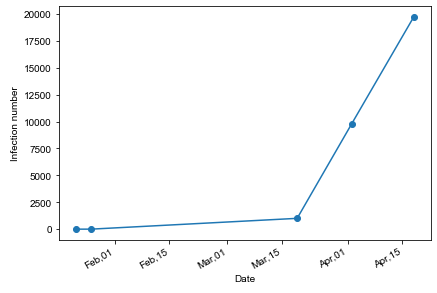

In [14]:
x_infeciton_date = [datetime.date(2020,1,22),datetime.date(2020,1,26),
     datetime.date(2020,3,19),datetime.date(2020,4,2),datetime.date(2020,4,18)]
y_infection_number = [0,2,1005,9768,19718]

plt.plot_date(x_infeciton_date,y_infection_number, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.style.use('seaborn')
#print(plt.style.available)
#plt.plot(x_infeciton_date,y_infection_number, marker = "o", linestyle = 'dashed')
plt.xlabel("Date")
plt.ylabel("Infection number")
#plt.legend()
plt.style.use('seaborn')
plt.savefig("CA_key_date_infection.png")
plt.show()


In [15]:
#x_infeciton_date_ny = [datetime.date(2020,1,22),datetime.date(2020,3,2),datetime.date(2020,3,22),datetime.date(2020,4,5),datetime.date(2020,4,18)]
#y_infection_number_ny = [0,1,15800,123160,241712]
#plt.plot_date(x_infeciton_date_ny,y_infection_number_ny, linestyle='dashed')
#plt.gcf().autofmt_xdate()
#date_format = mpl_dates.DateFormatter('%b,%d')
#plt.gca().xaxis.set_major_formatter(date_format)

#plt.tight_layout()
#plt.style.use('seaborn')
#plt.show()

In [16]:
california_df_sum['Date'] = pd.to_datetime(california_df_sum.Date)

california_df_sum

,Date,Infection number
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,2
...,...,...
83,2020-04-14,25356
84,2020-04-15,26686
85,2020-04-16,27677
86,2020-04-17,29157


In [17]:
infection_319_418 = california_df_sum.iloc[57:,:]
infection_319_418 = infection_319_418.reset_index()
infection_319_418

,index,Date,Infection number
0,57,2020-03-19,1005
1,58,2020-03-20,1243
2,59,2020-03-21,1405
3,60,2020-03-22,1646
4,61,2020-03-23,2108
5,62,2020-03-24,2538
6,63,2020-03-25,2998
7,64,2020-03-26,3899
8,65,2020-03-27,4657
9,66,2020-03-28,5095


In [47]:
infection_est = [30491,128640]
list_1 = ['Shelter in place', 'No Shelter in place']

SyntaxError: invalid syntax (<ipython-input-47-38718c79be3f>, line 2)

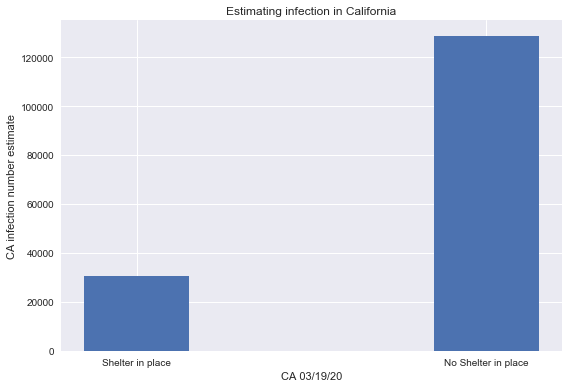

In [56]:
plt.bar(x = list_1, height = infection_est, width = 0.3)
plt.xlabel("CA 03/19/20")
plt.ylabel("CA infection number estimate")
plt.title("Estimating infection in California")
plt.tight_layout()
plt.savefig("CA_estimate_infection.png")

<BarContainer object of 31 artists>

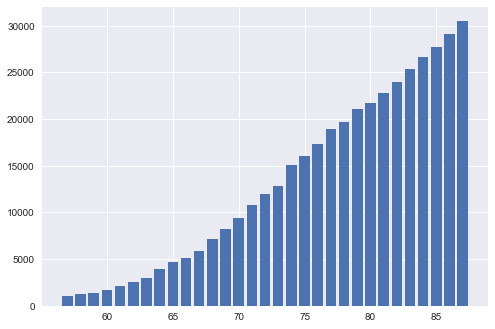

In [20]:
plt.bar(x = infection_319_418['index'], height = infection_319_418['Infection number'])

In [21]:
infection_319 = california_df_sum.iloc[57:72,:]
infection_319

,Date,Infection number
57,2020-03-19,1005
58,2020-03-20,1243
59,2020-03-21,1405
60,2020-03-22,1646
61,2020-03-23,2108
62,2020-03-24,2538
63,2020-03-25,2998
64,2020-03-26,3899
65,2020-03-27,4657
66,2020-03-28,5095


 Slope for 03/19 - 04/2 = 683.25


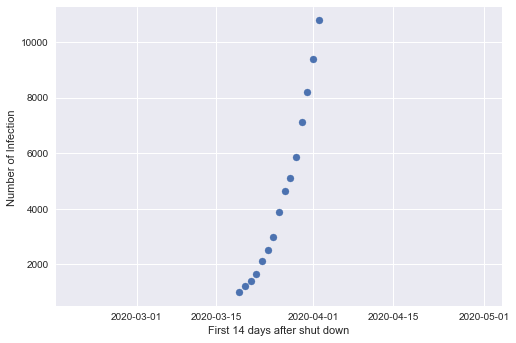

In [22]:
infection_319 = infection_319.reset_index()
x_319_value = infection_319['index']
y_319_value = infection_319['Infection number']
plt.scatter(infection_319['Date'],y_319_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_319_value, y_319_value)
regress_values = x_319_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f" Slope for 03/19 - 04/2 = {slope}")
plt.xlabel('First 14 days after shut down')
plt.ylabel('Number of Infection ')
plt.show()


y = 683.25x + -39196.93
Slope for 03/19 - 04/2 = 683.25
The r-squared is: 0.9403665907797626


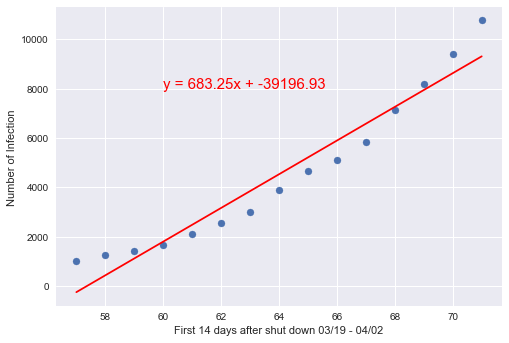

In [23]:
plt.scatter(x_319_value,y_319_value)
plt.plot(x_319_value,regress_values,"r-")
plt.annotate(line_eq,(60,8000),fontsize=15,color="red")
plt.xlabel('First 14 days after shut down 03/19 - 04/02')
plt.ylabel('Number of Infection ')
print(line_eq)
print(f"Slope for 03/19 - 04/2 = {slope}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("CA_0319_0402_Infection.png")
plt.show()

In [24]:
infection_402 = california_df_sum.iloc[72:,:]
infection_402

,Date,Infection number
72,2020-04-03,12004
73,2020-04-04,12837
74,2020-04-05,15034
75,2020-04-06,16019
76,2020-04-07,17351
77,2020-04-08,18897
78,2020-04-09,19710
79,2020-04-10,21081
80,2020-04-11,21706
81,2020-04-12,22795


Slope for 04/02 - 04/18 = 1199.45


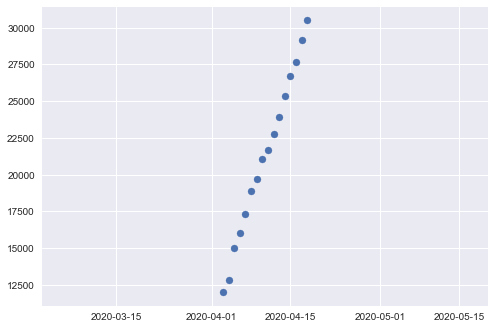

In [25]:
infection_402 = infection_402.reset_index()
x_402_value = infection_402['index']
y_402_value = infection_402['Infection number']
plt.scatter(infection_402['Date'],y_402_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_402_value, y_402_value)
regress_values = x_402_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Slope for 04/02 - 04/18 = {slope}")
plt.show()

y = 1199.45x + -74060.53
Slope for 04/02 - 04/18 = 1199.45
The r-squared is: 0.9966617185323675


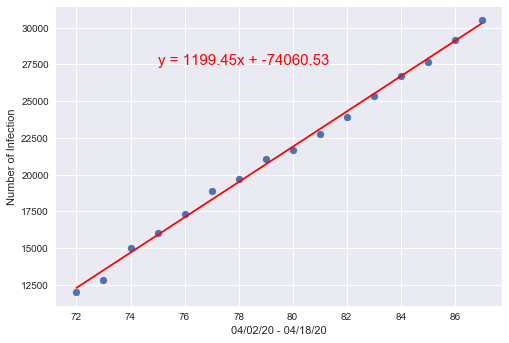

In [26]:
plt.scatter(x_402_value,y_402_value)
plt.plot(x_402_value,regress_values,"r-")
plt.annotate(line_eq,(75,27500),fontsize=15,color="red")
plt.xlabel('04/02/20 - 04/18/20')
plt.ylabel('Number of Infection')
print(line_eq)
print(f"Slope for 04/02 - 04/18 = {slope}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("CA_0402_0418_Infection.png")
plt.show()


## California COVID-19 Deaths Data 

In [27]:
df_2

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,44,45,45,51,56,58,60,62,63,64
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,2,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,84070008,US,USA,840,NaN,Marine Corps,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3265,84070009,US,USA,840,NaN,Navy,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,7
3266,84070013,US,USA,840,NaN,Staff,Federal Bureau of Prisons,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3267,84070010,US,USA,840,NaN,Unassigned,US Military,US,NaN,NaN,...,0,0,0,0,0,0,0,0,0,12


In [28]:
california_death_df = df_2.loc[df_2['Province_State'] == 'California']
california_death_df = california_death_df.drop(['Admin2','Province_State','Country_Region','UID','iso2','iso3','code3','FIPS','Lat','Long_','4/19/20','4/20/20','4/21/20'],axis = 1)
california_death_df = california_death_df.set_index('Combined_Key')
california_death_df

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Alameda, California, US",1671329,0,0,0,0,0,0,0,0,0,...,16,20,21,23,23,23,36,39,40,41
"Alpine, California, US",1129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Amador, California, US",39752,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Butte, California, US",219186,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Calaveras, California, US",45905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Colusa, California, US",21547,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Contra Costa, California, US",1153526,0,0,0,0,0,0,0,0,0,...,8,9,11,11,11,11,14,16,19,19
"Del Norte, California, US",27812,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"El Dorado, California, US",192843,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Check for any null value in dataframe 
death_null_data = california_death_df[california_death_df.isnull().any(axis=1)]
death_null_data

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,


In [30]:
#Find the first date of infection, which is when sum(infection number) > 0 
#3/4/20 is the first confirmed death in California 
california_death_df_sum= california_death_df.sum(axis = 0)
california_death_df_sum[california_death_df_sum > 0]


Population    39512223
3/4/20               1
3/5/20               1
3/6/20               1
3/7/20               1
3/8/20               1
3/9/20               1
3/10/20              2
3/11/20              4
3/12/20              4
3/13/20              4
3/14/20              3
3/15/20              5
3/16/20              7
3/17/20             12
3/18/20             16
3/19/20             18
3/20/20             24
3/21/20             25
3/22/20             30
3/23/20             39
3/24/20             50
3/25/20             65
3/26/20             81
3/27/20             94
3/28/20            110
3/29/20            124
3/30/20            146
3/31/20            173
4/1/20             199
4/2/20             238
4/3/20             265
4/4/20             289
4/5/20             348
4/6/20             380
4/7/20             432
4/8/20             495
4/9/20             544
4/10/20            583
4/11/20            604
4/12/20            640
4/13/20            714
4/14/20            767
4/15/20    

In [31]:
california_death_df_sum.to_frame()

,0
Population,39512223
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
...,...
4/14/20,767
4/15/20,860
4/16/20,956
4/17/20,1037


In [32]:
california_death_df_sum = california_death_df_sum.reset_index()
california_death_df_sum.columns = ['Date','Deaths']
california_death_df_sum

,Date,Deaths
0,Population,39512223
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
...,...,...
84,4/14/20,767
85,4/15/20,860
86,4/16/20,956
87,4/17/20,1037


In [33]:
death_319_418 = california_death_df_sum.iloc[58:,:]
death_319_418 = death_319_418.reset_index()
death_319_418

,index,Date,Deaths
0,58,3/19/20,18
1,59,3/20/20,24
2,60,3/21/20,25
3,61,3/22/20,30
4,62,3/23/20,39
5,63,3/24/20,50
6,64,3/25/20,65
7,65,3/26/20,81
8,66,3/27/20,94
9,67,3/28/20,110


<BarContainer object of 31 artists>

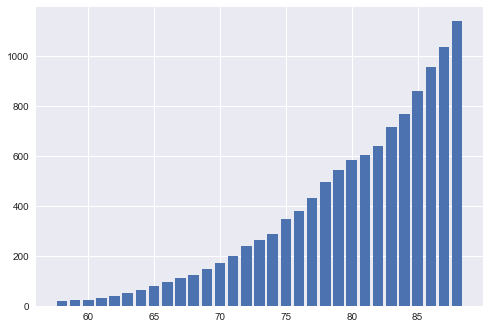

In [34]:
plt.bar(x = death_319_418['index'], height = death_319_418['Deaths'])

In [35]:
death_319 = california_death_df_sum.iloc[58:73,:]

In [36]:
death_319

,Date,Deaths
58,3/19/20,18
59,3/20/20,24
60,3/21/20,25
61,3/22/20,30
62,3/23/20,39
63,3/24/20,50
64,3/25/20,65
65,3/26/20,81
66,3/27/20,94
67,3/28/20,110


y = 14.99x + -880.14
Slope for 03/19 - 04/2 = 14.992857142857142


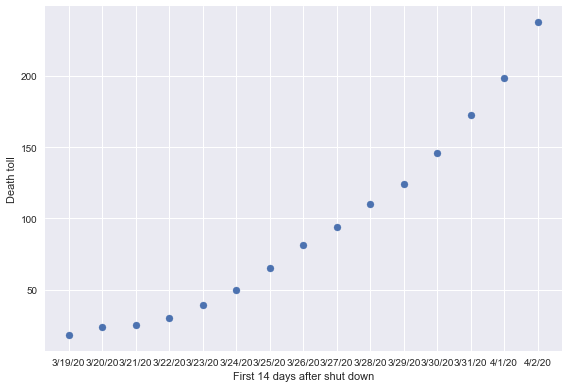

In [37]:

death_319 = death_319.reset_index()
x_319_values = death_319['index']
y_319_values = death_319['Deaths']
plt.scatter(death_319['Date'],y_319_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_319_values, y_319_values)
regress_values = x_319_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('First 14 days after shut down')
plt.ylabel('Death toll')
print(line_eq)
print(f"Slope for 03/19 - 04/2 = {slope}")

plt.tight_layout()
plt.show()

The r-squared is: 0.9343327002374323


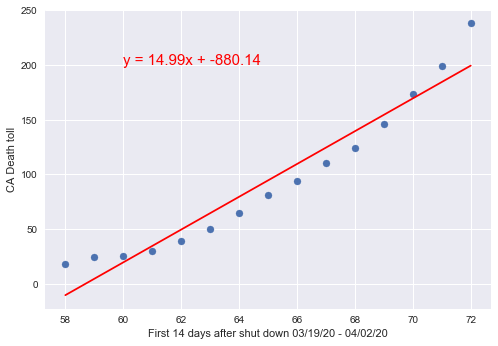

In [38]:
x_319_values = death_319['index']
plt.scatter(x_319_values,y_319_values)
plt.plot(x_319_values,regress_values,"r-")
plt.annotate(line_eq,(60,200),fontsize=15,color="red")
plt.xlabel('First 14 days after shut down 03/19/20 - 04/02/20')
plt.ylabel('CA Death toll')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("CA_0319_0402_Death.png")
plt.show()

In [39]:
death_402 = california_death_df_sum.iloc[73:,:]

In [40]:
death_402

,Date,Deaths
73,4/3/20,265
74,4/4/20,289
75,4/5/20,348
76,4/6/20,380
77,4/7/20,432
78,4/8/20,495
79,4/9/20,544
80,4/10/20,583
81,4/11/20,604
82,4/12/20,640


y = 55.3x + -3823.51
Slope for 04/02 - 04/18 = 55.30294117647059


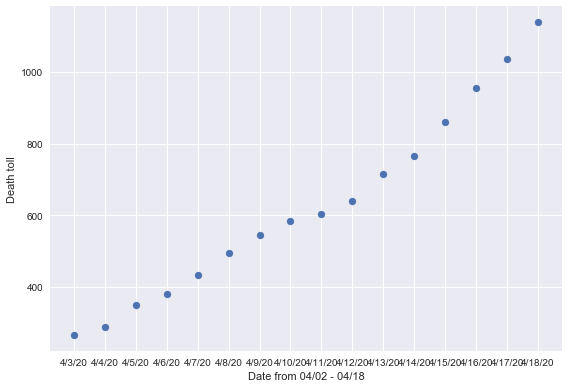

In [41]:
death_402 = death_402.reset_index()
x_402_values = death_402['index']
y_402_values = death_402['Deaths']
plt.scatter(death_402['Date'],y_402_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_402_values, y_402_values)
regress_values = x_402_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Date from 04/02 - 04/18')
plt.ylabel('Death toll')
print(line_eq)
print(f"Slope for 04/02 - 04/18 = {slope}")

plt.tight_layout()
plt.show()

The r-squared is: 0.9717895327018597


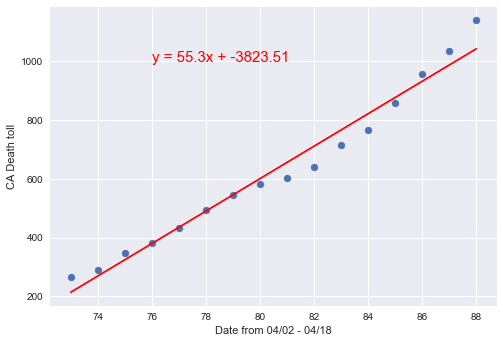

In [42]:
plt.scatter(x_402_values,y_402_values)
plt.plot(x_402_values,regress_values,"r-")
plt.annotate(line_eq,(76,1000),fontsize=15,color="red")
plt.xlabel('Date from 04/02 - 04/18')
plt.ylabel('CA Death toll')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("CA_0402_0418_Death.png")
plt.show()

In [43]:
ca_death_key_date_df= california_death_df[['Population','3/3/20','3/4/20','3/18/20','3/19/20','3/20/20','4/18/20']]
ca_death_key_date_df

,Population,3/3/20,3/4/20,3/18/20,3/19/20,3/20/20,4/18/20
Combined_Key,,,,,,,
"Alameda, California, US",1671329,0,0,0,0,0,41
"Alpine, California, US",1129,0,0,0,0,0,0
"Amador, California, US",39752,0,0,0,0,0,0
"Butte, California, US",219186,0,0,0,0,0,0
"Calaveras, California, US",45905,0,0,0,0,0,0
"Colusa, California, US",21547,0,0,0,0,0,0
"Contra Costa, California, US",1153526,0,0,0,0,1,19
"Del Norte, California, US",27812,0,0,0,0,0,0
"El Dorado, California, US",192843,0,0,0,0,0,0


In [44]:
death_rate_shelter = ca_death_key_date_df['4/18/20'] - ca_death_key_date_df['3/18/20']
ca_death_key_date_df['Deaths after shelter at home'] = death_rate_shelter
ca_death_key_date_df.sort_values(by = ['Deaths after shelter at home'], ascending = False)

C:\Users\ericw\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Population,3/3/20,3/4/20,3/18/20,3/19/20,3/20/20,4/18/20,Deaths after shelter at home
Combined_Key,,,,,,,,
"Los Angeles, California, US",10039107,0,0,1,2,2,576,575
"San Diego, California, US",3338330,0,0,0,0,0,70,70
"Santa Clara, California, US",1927852,0,0,6,6,8,73,67
"Riverside, California, US",2470546,0,0,3,3,4,69,66
"San Bernardino, California, US",2180085,0,0,0,0,0,57,57
"Alameda, California, US",1671329,0,0,0,0,0,41,41
"Orange, California, US",3175692,0,0,0,0,0,32,32
"Sacramento, California, US",1552058,0,0,2,3,3,33,31
"San Mateo, California, US",766573,0,0,1,1,1,28,27


In [45]:
#Calculating deaths number after shelter at home 
death_number_shelter = ca_death_key_date_df['Deaths after shelter at home'].sum()
death_shelter_start = ca_death_key_date_df['3/18/20'].sum()
death_to_date = ca_death_key_date_df['4/18/20'].sum()

print(f"Total deaths to 03/18/20: {death_shelter_start} people")
print(f"Total deaths to 04/18/20: {death_to_date} people")
print(f"There are {death_number_shelter} deaths after shelter at home was ordered")


Total deaths to 03/18/20: 16 people
Total deaths to 04/18/20: 1140 people
There are 1124 deaths after shelter at home was ordered
